In [15]:
import numpy as np
#0,2,6,7,9,14,15,16,17,18
list = []
list1 = []
with open('C:\RUTGERS\Analytics\BDdata_S1_prateek5.csv') as f:
    for line in f:
        ele = line.split(',')
        #Normal
        list.append(np.delete(line.split(','), [0,1,2,5,10,12]).tolist())
        #LTDuration
        #list.append(np.delete(line.split(','), [0,1,2,5,9,12]).tolist())

"""
count = 0
print (list[0])
del list[0]
for ele in list:
    if float(ele[8]) == float(ele[9]):
        count = count+1
print (count)
"""
print (list[0])
print (list[1])
print (list[2])
print (list[25645])

['GENDER', 'AGE', 'MONTHJOINED', 'SOURCE', 'DEVICE', 'LTDURATION_normalized', 'Day0CLV', 'LTCLV_binary\n']
['F', '71.11666667', 'January', 'HumanInteraction', 'NULL', '1.195024414', '37.19', 'repeatPurchaser\n']
['F', '44.28333333', 'July', 'facebook', 'anphone', '-1.054390965', '37.31', 'singlePurchaser\n']
['F', '57.875', 'April', 'facebook', 'anphone', '-0.09805269', '37.19', 'repeatPurchaser\n']


In [16]:
del list[0]

In [17]:
class_train = []
for ele in list:
    if ele[7] == 'repeatPurchaser\n':
        class_train.append(0)
    else:
        class_train.append(1)

In [18]:
gender = ['F','M','NULL']
MonthJoined = ['January','February','March','April','May','June','July','August','September','October', 'NULL']

source = ['facebook', 'NULL', 'HumanInteraction', 'bing', 'adwords', 'pinterest', 'retargeting', 'affiliate', 'google', 'youtube', 'thrivefacebook']
device = ['iphone', 'NULL', 'anphone', 'desktop']

final = []

for ele in list:
    gen = ele[0]
    mon = ele[2]
    sou = ele[3]
    dev = ele[4]
    if ele[1] == 'NULL':
        age = 7
    elif float(ele[1]) <= 17:
        age = 0
    elif float(ele[1]) <= 24:
        age = 1
    elif float(ele[1]) <= 34:
        age = 2
    elif float(ele[1]) <= 44:
        age = 3
    elif float(ele[1]) <= 54:
        age = 4
    elif float(ele[1]) <= 64:
        age = 5
    else:
        age = 6
    if ele[1] == 'NULL':
        ele[1] = 0
    if ele[5] == 'NULL':
        ele[5] = 0
    if ele[6] == 'NULL':
        ele[6] = 0
    #Normal
    final.append([gender.index(gen), float(ele[1]), MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[5]), float(ele[6])])
    #Remove AGe and LTDuration
    #final.append([gender.index(gen), MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[6])])
    #Nominal Age
    #final.append([gender.index(gen), age, MonthJoined.index(mon), source.index(sou), device.index(dev), float(ele[5]), float(ele[6])])

    
print (list[0])
print (list[1])
print (final[0])
print (final[1])

['F', '71.11666667', 'January', 'HumanInteraction', 'NULL', '1.195024414', '37.19', 'repeatPurchaser\n']
['F', '44.28333333', 'July', 'facebook', 'anphone', '-1.054390965', '37.31', 'singlePurchaser\n']
[0, 71.11666667, 0, 2, 1, 1.195024414, 37.19]
[0, 44.28333333, 6, 0, 2, -1.054390965, 37.31]


In [19]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(final, class_train, test_size=0.2, random_state=0)

c = Counter(y_train)
print (c.most_common())

c = Counter(y_test)
print (c.most_common())


print (len(y_train))
print (len(y_test))

[(1, 20427), (0, 12717)]
[(1, 5129), (0, 3157)]
33144
8286


In [20]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.605599806903
             precision    recall  f1-score   support

   Multiple       0.48      0.34      0.40      3157
       Once       0.65      0.77      0.71      5129

avg / total       0.59      0.61      0.59      8286

Confusion matrix, without normalization
[[1076 2081]
 [1187 3942]]
{'fit_time': array([ 0.06824517,  0.04211187,  0.04211164,  0.04512024,  0.04562163,
        0.04411769,  0.04463482,  0.04211116,  0.04211092,  0.0421133 ]), 'score_time': array([ 0.02607012,  0.01554155,  0.01554012,  0.01604295,  0.01654363,
        0.01654363,  0.0165441 ,  0.01554155,  0.01554084,  0.01553988]), 'test_accuracy': array([ 0.60844646,  0.58763198,  0.61930618,  0.60723982,  0.5918552 ,
        0.59155354,  0.61085973,  0.6024751 ,  0.59855116,  0.59855116]), 'train_accuracy': array([ 0.60089175,  0.60320493,  0.59968487,  0.60102585,  0.60273559,
        0.60276912,  0.60062355,  0.60155543,  0.60199122,  0.60202474]), 'test_precision_weighted': array([ 0.58879071, 

SystemExit: 

C:\Users\prate\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


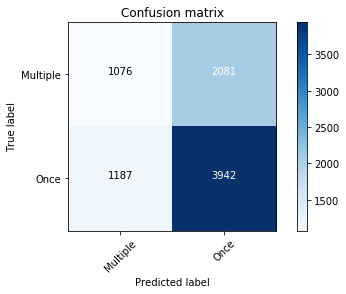

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB


class_names = ['Multiple','Once']
#print len(X_train)
#print len(y_train)

clf = BernoulliNB()
clf.fit(X_train, y_train)

pred = clf.predict(np.array(X_test))
proba = clf.predict_proba(np.array(X_test))

score = []
for ele in proba:
    score.append(ele[1])

from sklearn.metrics import accuracy_score
print ('Accuracy: '+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names=class_names))


cnf_matrix = confusion_matrix(y_test, pred)


%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

#For Cross Validation
scores = cross_validate(clf, X_train, y_train, cv=10, scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'])
print (scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features = None)

clf2.fit(X_train, y_train)

pred2 = clf2.predict(np.array(X_test))
proba2 = clf2.predict_proba(np.array(X_test))
tree = clf2.decision_path(X_test)
print (clf2.feature_importances_)

print (tree)

score2 = []
for ele in proba2:
    score2.append(ele[1])


print ('Accuracy: '+str(accuracy_score(y_test, pred2)))
print(classification_report(y_test, pred2, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred2)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

#For Cross Validation
scores = cross_validate(clf2, X_train, y_train, cv=10, scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'])
print (scores)

In [ ]:
from sklearn.svm import SVC

clf3 = SVC(probability=True)

clf3.fit(X_train, y_train)

pred3 = clf3.predict(np.array(X_test))
proba3 = clf3.predict_proba(np.array(X_test))

score3 = []
for ele in proba3:
    score3.append(ele[1])

print ('Accuracy: '+str(accuracy_score(y_test, pred3)))
print(classification_report(y_test, pred3, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, pred3)

%matplotlib inline
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, score)
plt.plot(fpr,tpr,color='b', alpha=0.2, label= 'Naive')

fpr2, tpr2, thresholds2 = roc_curve(y_test, score2)
plt.plot(fpr2,tpr2,color='r', alpha=0.2, label= 'RF')

fpr3, tpr3, thresholds3 = roc_curve(y_test, score3)
plt.plot(fpr3,tpr3,color='g', alpha=0.2, label= 'SVC')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.figure

#For Cross Validation
scores = cross_validate(clf3, X_train, y_train, cv=10, scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted'])
print (scores)